In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
xls = pd.read_excel('elektrik_veri.xls')

In [3]:
excel_file_obj = pd.ExcelFile('elektrik_veri.xls')
print("Sayfa isimleri:", excel_file_obj.sheet_names)


Sayfa isimleri: ['Tahsilat', 'Tahsilat 1', 'Tahakkuk', 'Tahakkuk 1', 'Tahakkuk 2']


In [4]:
# Her sayfayı ayrı DataFrame'e yükle
df_tahsilat = pd.read_excel(excel_file_obj, sheet_name='Tahsilat')
df_tahsilat_1 = pd.read_excel(excel_file_obj, sheet_name='Tahsilat 1')
df_tahakkuk = pd.read_excel(excel_file_obj, sheet_name='Tahakkuk') # Hamamözü
df_tahakkuk_1 = pd.read_excel(excel_file_obj, sheet_name='Tahakkuk 1') # Gümüşhacıköy
df_tahakkuk_2 = pd.read_excel(excel_file_obj, sheet_name='Tahakkuk 2') # Göynücek

In [5]:
df_hamamozu = df_tahsilat_1[df_tahsilat_1['İlçe'] == 'HAMAMÖZÜ']
hesap_sinifi_hamamozu = df_hamamozu['Hesap Sınıfı'].value_counts()
print("Hamamözü - Hesap Sınıfı Dağılımı:\n", hesap_sinifi_hamamozu)

df_gumushacikoy = df_tahsilat_1[df_tahsilat_1['İlçe'] == 'GÜMÜŞHACIKÖY']
hesap_sinifi_gumushacikoy = df_gumushacikoy['Hesap Sınıfı'].value_counts()
print("\nGümüşhacıköy - Hesap Sınıfı Dağılımı:\n", hesap_sinifi_gumushacikoy)

df_goynucek = df_tahsilat_1[df_tahsilat_1['İlçe'] == 'GÖYNÜCEK']
hesap_sinifi_goynucek = df_goynucek['Hesap Sınıfı'].value_counts()
print("\nGöynücek - Hesap Sınıfı Dağılımı:\n", hesap_sinifi_goynucek)

Hamamözü - Hesap Sınıfı Dağılımı:
 Hesap Sınıfı
Mesken                                      1359
Ticari Faaliyet - Yazıhane                   107
İbadethane Isıtma/Soğutma/Lojman              23
İbadethane Aydınlatma                         21
Bina Ort Kul (Asn,Hidr,Kapıcı Dai vb.)        20
1 SAYILI CETVELDE YER ALAN KAMU İDARESİ       16
Tarımsal Faaliyetler (Şahıs)                   7
Şantiye ve Geçici Aboneler                     5
Belediye                                       3
Resmi Daire Lojman                             3
Şehit Aileleri ve Gaziler                      2
Resmi SAĞLIK KURULUŞLARI,RESMİ SPOR TES.       2
Köy İçme Suyu Temini ve Dağıtımı Tesisi        2
Süt Toplama Merkezi                            2
Resmi Hayır Kurumları,Dernek,Vakıf,Müze        2
Kar Amacı Güden Dernek,Vakıf,Müze              1
Balıkçılık ve Su Ürünleri Yetiştiriciliğ       1
İçme-Kullanma Suyu (Belediye)                  1
Resmi Daire                                    1
Büyükbaş-Küçükbaş Hay

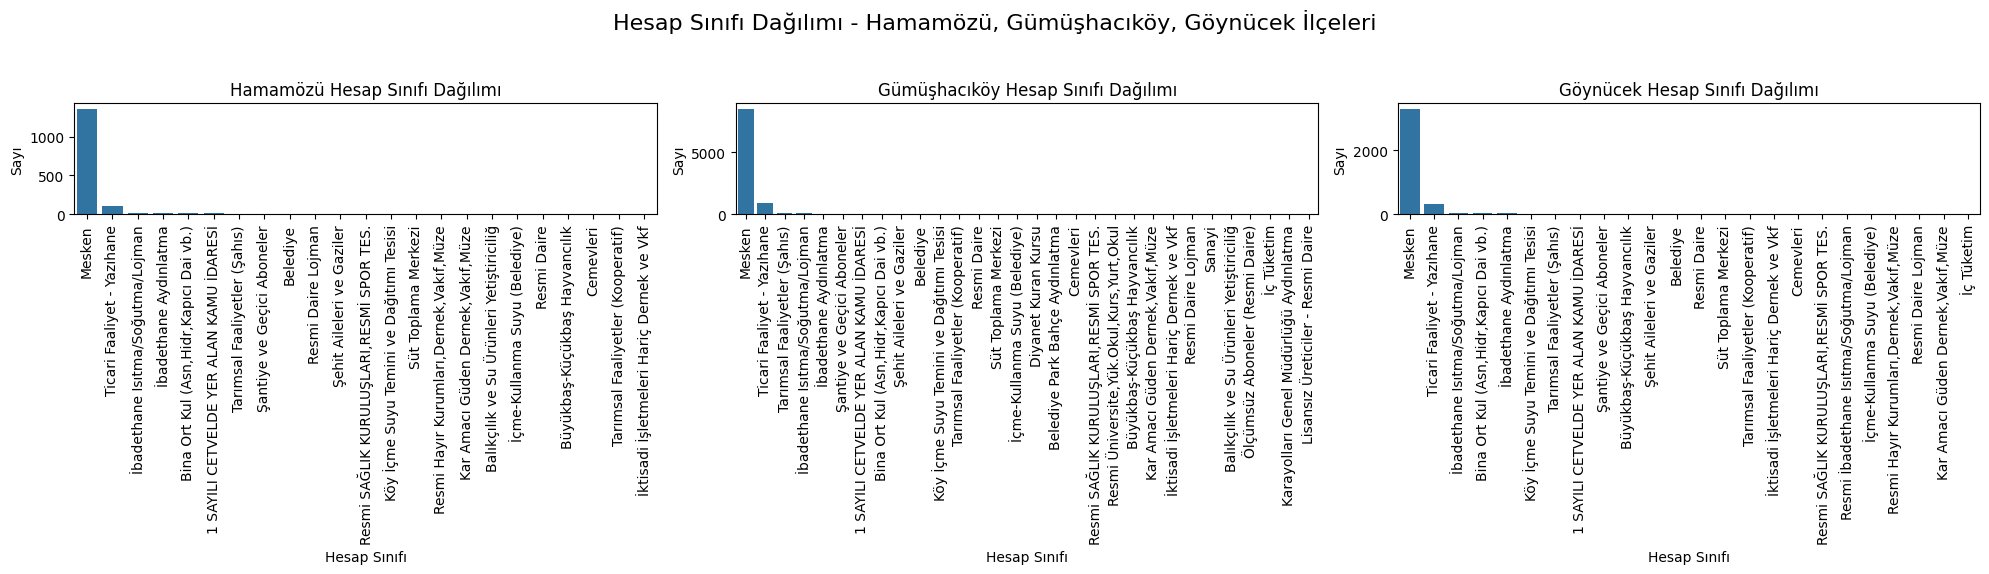

In [7]:

fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=False)

# Hamamözü
sns.barplot(x=hesap_sinifi_hamamozu.index, y=hesap_sinifi_hamamozu.values, ax=axes[0])
axes[0].set_title('Hamamözü Hesap Sınıfı Dağılımı')
axes[0].set_xlabel('Hesap Sınıfı')
axes[0].set_ylabel('Sayı')
axes[0].tick_params(axis='x', rotation=90)

# Gümüşhacıköy
sns.barplot(x=hesap_sinifi_gumushacikoy.index, y=hesap_sinifi_gumushacikoy.values, ax=axes[1])
axes[1].set_title('Gümüşhacıköy Hesap Sınıfı Dağılımı')
axes[1].set_xlabel('Hesap Sınıfı')
axes[1].set_ylabel('Sayı')
axes[1].tick_params(axis='x', rotation=90)

# Göynücek
sns.barplot(x=hesap_sinifi_goynucek.index, y=hesap_sinifi_goynucek.values, ax=axes[2])
axes[2].set_title('Göynücek Hesap Sınıfı Dağılımı')
axes[2].set_xlabel('Hesap Sınıfı')
axes[2].set_ylabel('Sayı')
axes[2].tick_params(axis='x', rotation=90)


fig.suptitle('Hesap Sınıfı Dağılımı - Hamamözü, Gümüşhacıköy, Göynücek İlçeleri', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Aylık ortalama tüketimi her ilçe için hesaplayın ve çizgi grafiği ile mevsimsel trendi görselleştirin


In [8]:
print(df_tahakkuk.columns)

Index(['il', 'ilce', 'sozlesme_hesap_no', 'mali_yil_donem', 'fatura_tarihi',
       'kayit_tarihi', 'vade_tarihi', 'hesap_sinifi', 'Hesap Sınıfı', 'kwh'],
      dtype='object')


In [10]:
df_tahakkuk['fatura_tarihi'] = pd.to_datetime(df_tahakkuk['fatura_tarihi'])
df_tahakkuk['month_name_tahakkuk'] = df_tahakkuk['fatura_tarihi'].dt.month_name()
monthly_consumption_hamamozu = df_tahakkuk.groupby('month_name_tahakkuk')['kwh'].sum()

df_tahakkuk_1['fatura_tarihi'] = pd.to_datetime(df_tahakkuk_1['fatura_tarihi'])
df_tahakkuk_1['month_name_tahakkuk_1'] = df_tahakkuk_1['fatura_tarihi'].dt.month_name()
monthly_consumption_gumushacikoy = df_tahakkuk_1.groupby('month_name_tahakkuk_1')['kwh'].sum()

df_tahakkuk_2['fatura_tarihi'] = pd.to_datetime(df_tahakkuk_2['fatura_tarihi'])
df_tahakkuk_2['month_name_tahakkuk_2'] = df_tahakkuk_2['fatura_tarihi'].dt.month_name()
monthly_consumption_goynucek = df_tahakkuk_2.groupby('month_name_tahakkuk_2')['kwh'].sum()

print("Monthly consumption for Hamamözü:\n", monthly_consumption_hamamozu)
print("\nMonthly consumption for Gümüşhacıköy:\n", monthly_consumption_gumushacikoy)
print("\nMonthly consumption for Göynücek:\n", monthly_consumption_goynucek)

Monthly consumption for Hamamözü:
 month_name_tahakkuk
April        79942.58
August       82505.85
December     50690.85
February     70241.13
January      65621.94
July         96057.13
June         75045.91
March        69136.33
May          83251.68
November     51051.40
October      53018.42
September    63397.05
Name: kwh, dtype: float64

Monthly consumption for Gümüşhacıköy:
 month_name_tahakkuk_1
April        113162.44
August       132542.31
December      51712.94
February      77085.34
January       70859.20
July         252492.00
June         166635.36
March         78860.53
May           92954.91
November      59616.61
October       57799.02
September     76613.45
Name: kwh, dtype: float64

Monthly consumption for Göynücek:
 month_name_tahakkuk_2
April        110094.62
August       142974.20
December      84883.69
February      99812.07
January       91291.81
July         187757.60
June         133471.37
March         96817.63
May           78188.82
November      52097.35
Oct

In [14]:
monthly_average_consumption_hamamozu = df_tahakkuk.groupby('month_name_tahakkuk')['kwh'].mean()
monthly_average_consumption_gumushacikoy = df_tahakkuk_1.groupby('month_name_tahakkuk_1')['kwh'].mean()
monthly_average_consumption_goynucek = df_tahakkuk_2.groupby('month_name_tahakkuk_2')['kwh'].mean()

print("Monthly average consumption for Hamamözü:\n", monthly_average_consumption_hamamozu)
print("\nMonthly average consumption for Gümüşhacıköy:\n", monthly_average_consumption_gumushacikoy)
print("\nMonthly average consumption for Göynücek:\n", monthly_average_consumption_goynucek)

Monthly average consumption for Hamamözü:
 month_name_tahakkuk
April        51.944496
August       61.342639
December     41.858671
February     48.408773
January      56.135107
July         54.702238
June         48.137210
March        47.779081
May          51.741255
November     49.903617
October      49.227874
September    52.963283
Name: kwh, dtype: float64

Monthly average consumption for Gümüşhacıköy:
 month_name_tahakkuk_1
April         71.216136
August        90.349223
December      45.441951
February      58.046190
January       64.711598
July         141.610768
June          98.600805
March         54.349090
May           55.761794
November      57.880204
October       56.610206
September     68.161432
Name: kwh, dtype: float64

Monthly average consumption for Göynücek:
 month_name_tahakkuk_2
April         66.282131
August        98.061866
December      77.803566
February      70.788702
January       80.433313
July         106.862607
June          83.524011
March         68.

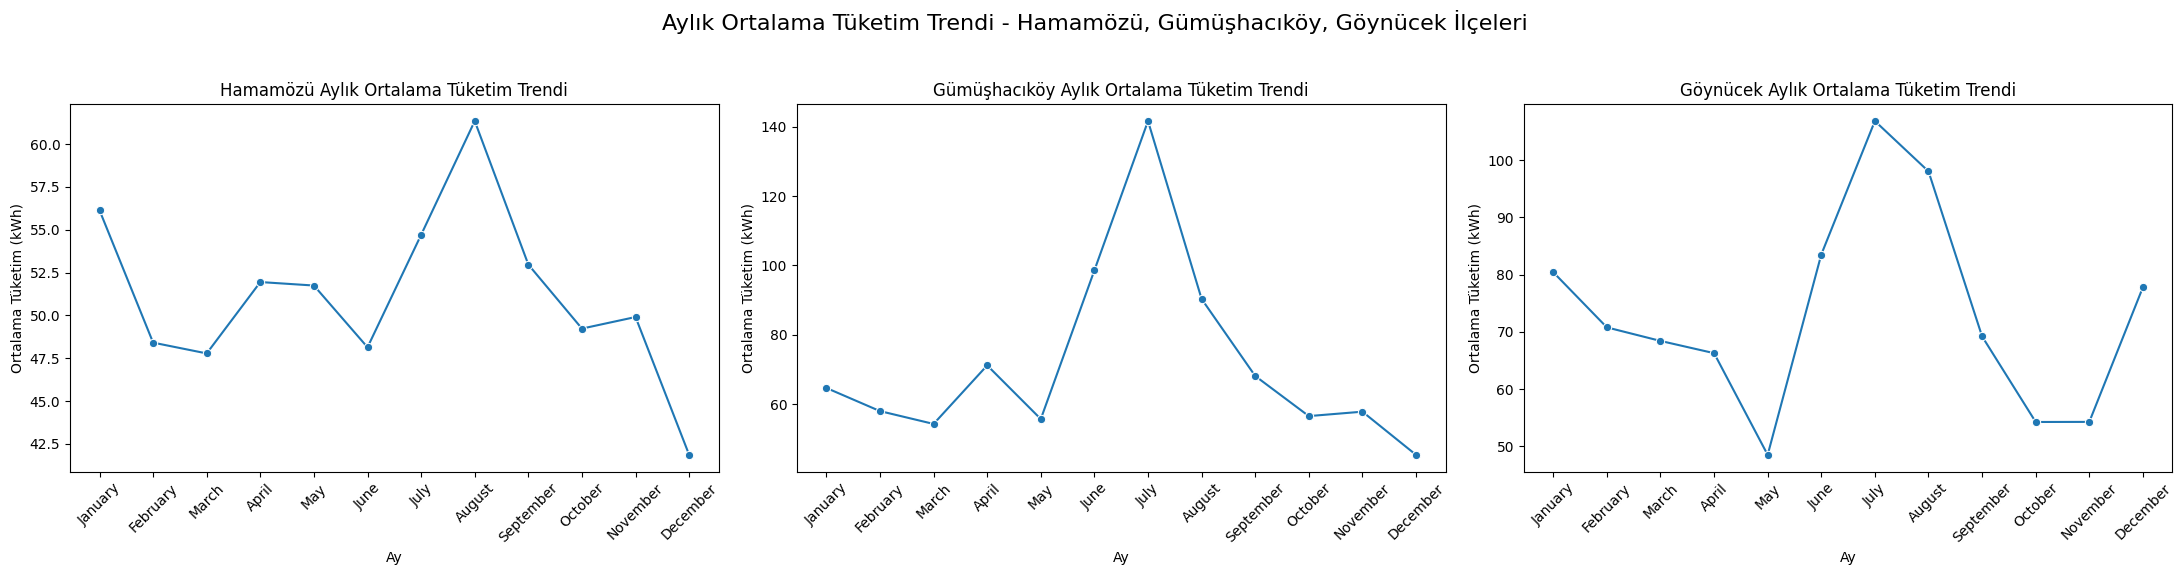

In [15]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

fig, axes = plt.subplots(1, 3, figsize=(22, 6), sharey=False)

# Hamamözü
monthly_average_consumption_hamamozu = monthly_average_consumption_hamamozu.reindex(month_order)
sns.lineplot(x=monthly_average_consumption_hamamozu.index, y=monthly_average_consumption_hamamozu.values, ax=axes[0], marker='o')
axes[0].set_title('Hamamözü Aylık Ortalama Tüketim Trendi')
axes[0].set_xlabel('Ay')
axes[0].set_ylabel('Ortalama Tüketim (kWh)')
axes[0].tick_params(axis='x', rotation=45)

# Gümüşhacıköy
monthly_average_consumption_gumushacikoy = monthly_average_consumption_gumushacikoy.reindex(month_order)
sns.lineplot(x=monthly_average_consumption_gumushacikoy.index, y=monthly_average_consumption_gumushacikoy.values, ax=axes[1], marker='o')
axes[1].set_title('Gümüşhacıköy Aylık Ortalama Tüketim Trendi')
axes[1].set_xlabel('Ay')
axes[1].set_ylabel('Ortalama Tüketim (kWh)')
axes[1].tick_params(axis='x', rotation=45)

# Göynücek
monthly_average_consumption_goynucek = monthly_average_consumption_goynucek.reindex(month_order)
sns.lineplot(x=monthly_average_consumption_goynucek.index, y=monthly_average_consumption_goynucek.values, ax=axes[2], marker='o')
axes[2].set_title('Göynücek Aylık Ortalama Tüketim Trendi')
axes[2].set_xlabel('Ay')
axes[2].set_ylabel('Ortalama Tüketim (kWh)')
axes[2].tick_params(axis='x', rotation=45)


fig.suptitle('Aylık Ortalama Tüketim Trendi - Hamamözü, Gümüşhacıköy, Göynücek İlçeleri', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Tahsilat sayfasındaki İlçe ve Şube dağılımlarını bar chart ile görselleştirin

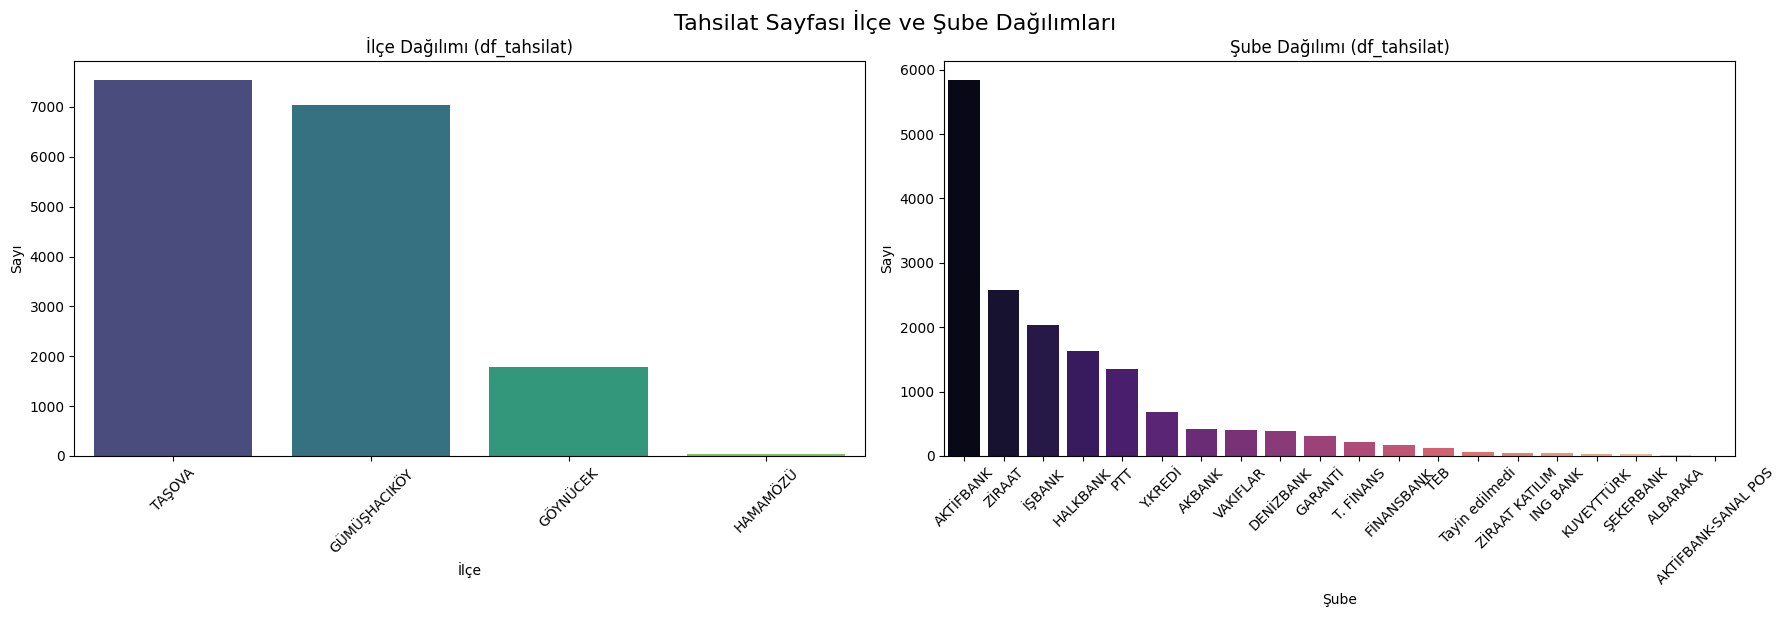

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

#'İlçe','Şube' from df_tahsilat
ilce_counts = df_tahsilat['İlçe'].value_counts()
şube_counts = df_tahsilat['Şube'].value_counts()


fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for İlçe
sns.barplot(x=ilce_counts.index, y=ilce_counts.values, ax=axes[0], palette='viridis', hue=ilce_counts.index, legend=False)
axes[0].set_title('İlçe Dağılımı (df_tahsilat)')
axes[0].set_xlabel('İlçe')
axes[0].set_ylabel('Sayı')
axes[0].tick_params(axis='x', rotation=45)

# Plot for Şube
sns.barplot(x=şube_counts.index, y=şube_counts.values, ax=axes[1], palette='magma', hue=şube_counts.index, legend=False)
axes[1].set_title('Şube Dağılımı (df_tahsilat)')
axes[1].set_xlabel('Şube')
axes[1].set_ylabel('Sayı')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.suptitle('Tahsilat Sayfası İlçe ve Şube Dağılımları', fontsize=16, y=1.02)
plt.show()

Tahsilat 1 verisinden zamanında ve geç ödeme oranlarını hesaplayıp pasta grafiği oluşturun


In [17]:
print(df_tahsilat_1.columns)

Index(['Mali yıl/dönem', 'İl', 'İlçe', 'Söz.hsp.(bağımsız)', 'Hesap Sınıfı',
       'Tahakkuk Tutar', 'Son Ödeme Tarihinden Önceki Tahsilat',
       'Son Ödeme Tarihindeki Tahsilat', 'Son Ödeme (1)', 'Son Ödeme (2)',
       'Son Ödeme (3)', 'Son Ödeme (4)', 'Son Ödeme (5)', 'Son Ödeme (6-10)',
       'Son Ödeme (10-20)', 'Son Ödeme (20-30)', 'Son Ödeme (30-60)',
       'Son Ödeme (60-90)', 'Son Ödeme (90-120)', 'Son Ödeme (120-150)',
       'Son Ödeme (150-180)', 'Son Ödeme (180+)'],
      dtype='object')


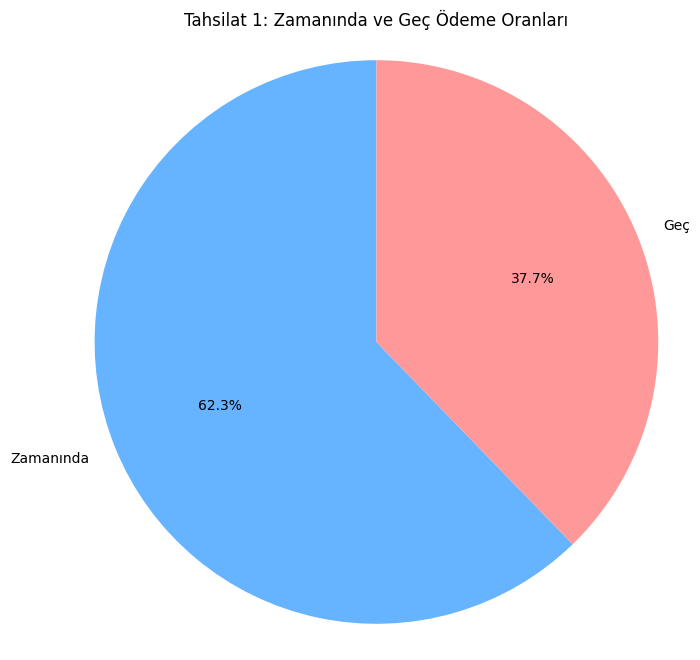

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# l 'Zamanında'
on_time_payments = df_tahsilat_1['Son Ödeme Tarihinden Önceki Tahsilat'].sum() + df_tahsilat_1['Son Ödeme Tarihindeki Tahsilat'].sum()

# 'Geç'
late_payment_columns = [col for col in df_tahsilat_1.columns if 'Son Ödeme (' in col]
late_payments = df_tahsilat_1[late_payment_columns].sum().sum()

odeme_durumu_data = pd.Series({'Zamanında': on_time_payments, 'Geç': late_payments})


plt.figure(figsize=(8, 8))
plt.pie(odeme_durumu_data, labels=odeme_durumu_data.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Tahsilat 1: Zamanında ve Geç Ödeme Oranları')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

kWh tüketim dağılımını histogram ve box plot ile görselleştirin, outlier'ları işaretleyin

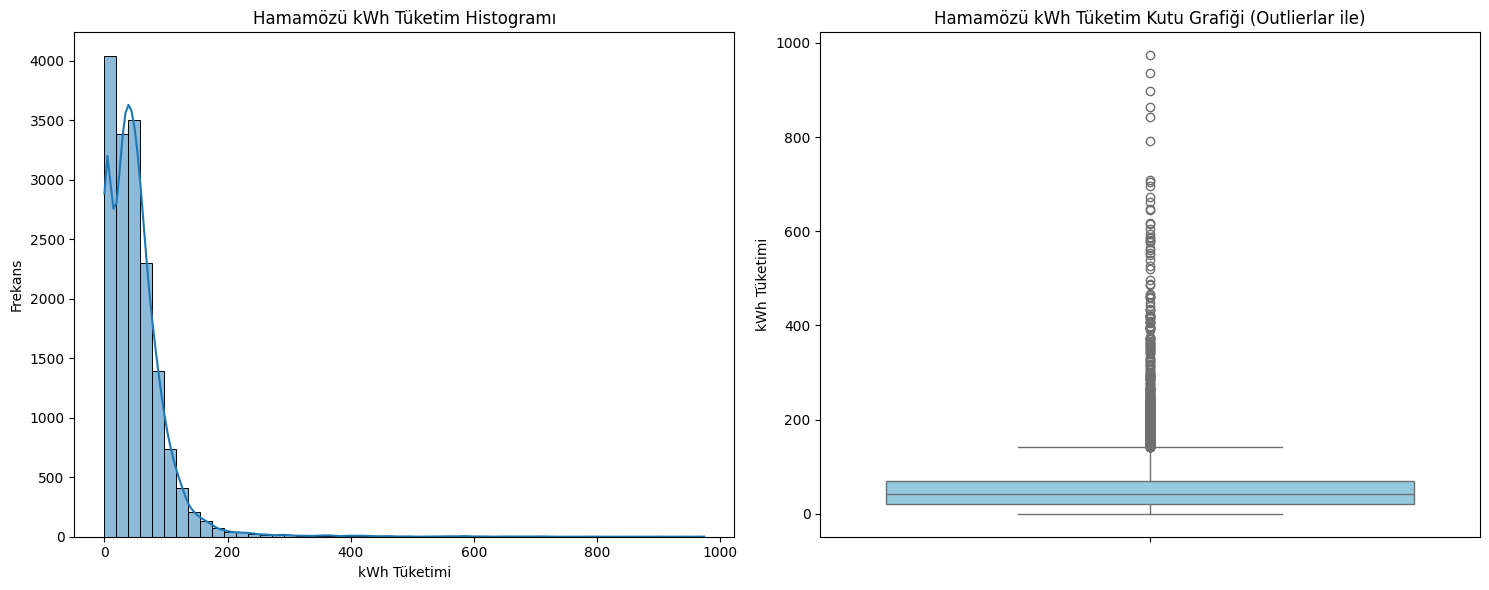

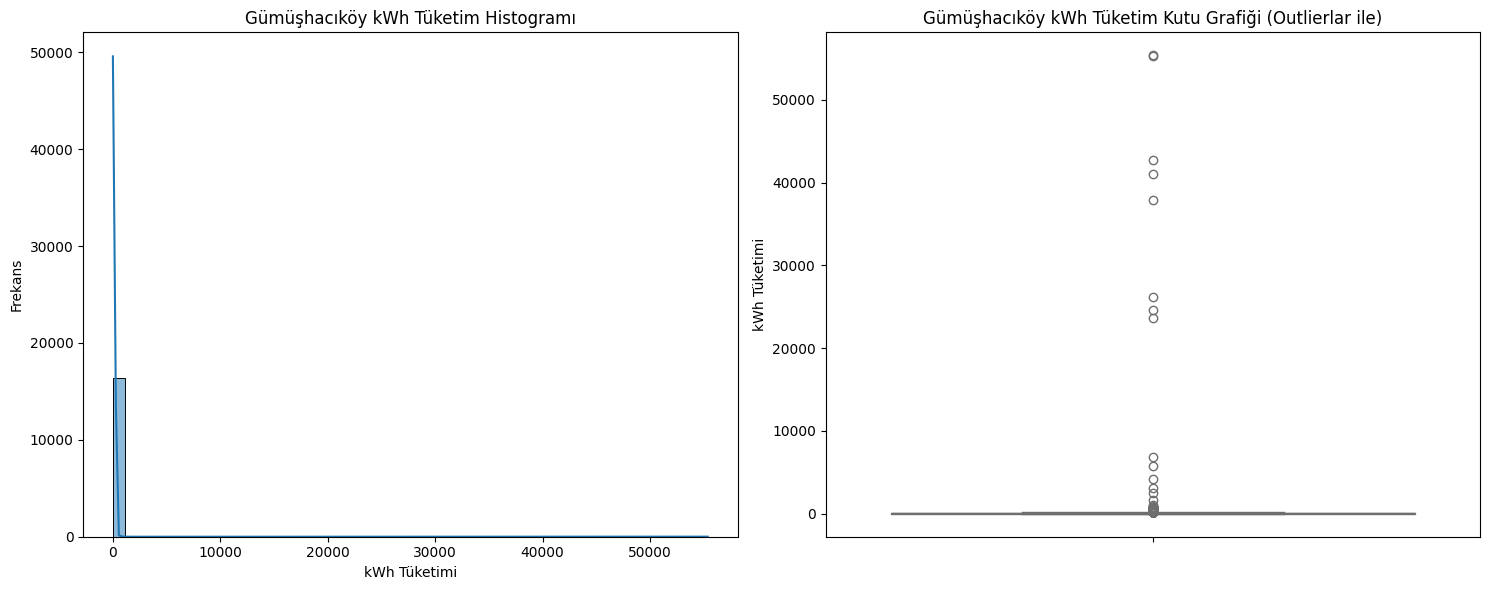

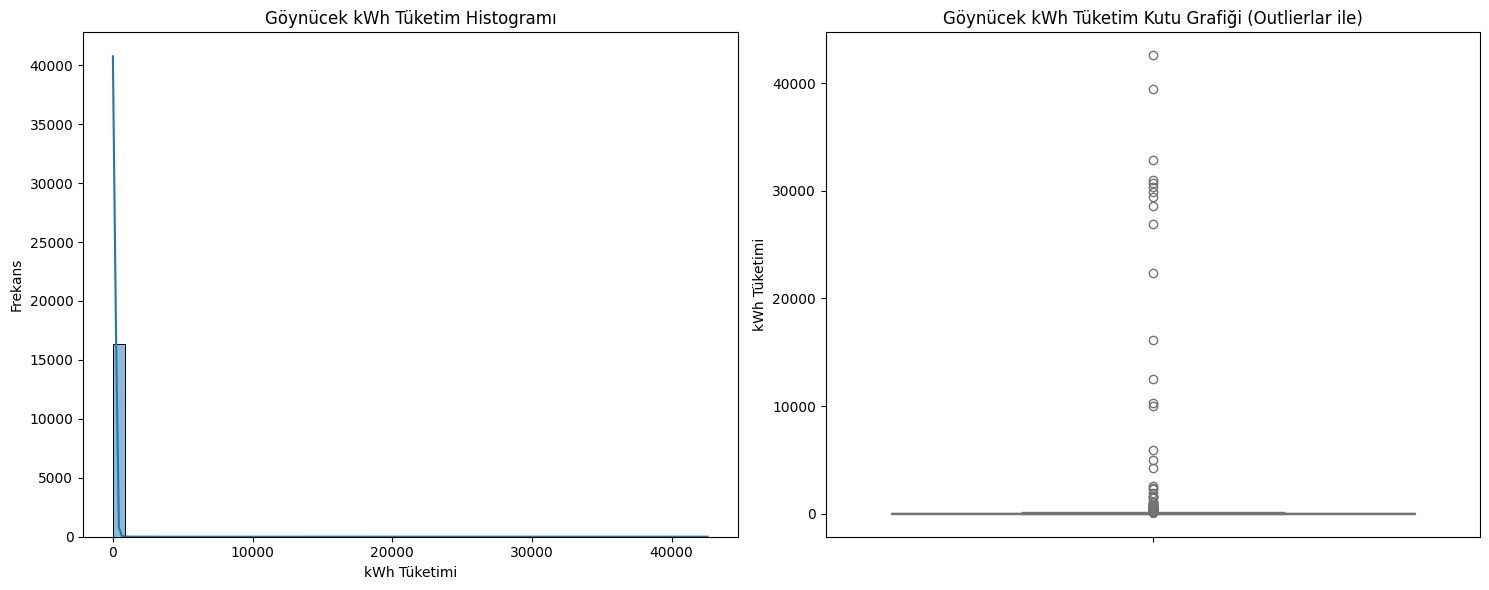

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Hamamözü (df_tahakkuk) kWh Tüketim Dağılımı ---
plt.figure(figsize=(15, 6))

# Histogram
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.histplot(df_tahakkuk['kwh'], kde=True, bins=50)
plt.title('Hamamözü kWh Tüketim Histogramı')
plt.xlabel('kWh Tüketimi')
plt.ylabel('Frekans')

# Box Plot
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.boxplot(y=df_tahakkuk['kwh'], color='skyblue')
plt.title('Hamamözü kWh Tüketim Kutu Grafiği (Outlierlar ile)')
plt.ylabel('kWh Tüketimi')
plt.tight_layout()
plt.show()

# --- Gümüşhacıköy (df_tahakkuk_1) kWh Tüketim Dağılımı ---
plt.figure(figsize=(15, 6))

# Histogram
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.histplot(df_tahakkuk_1['kwh'], kde=True, bins=50)
plt.title('Gümüşhacıköy kWh Tüketim Histogramı')
plt.xlabel('kWh Tüketimi')
plt.ylabel('Frekans')

# Box Plot
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.boxplot(y=df_tahakkuk_1['kwh'], color='lightcoral')
plt.title('Gümüşhacıköy kWh Tüketim Kutu Grafiği (Outlierlar ile)')
plt.ylabel('kWh Tüketimi')
plt.tight_layout()
plt.show()

# --- Göynücek (df_tahakkuk_2) kWh Tüketim Dağılımı ---
plt.figure(figsize=(15, 6))

# Histogram
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.histplot(df_tahakkuk_2['kwh'], kde=True, bins=50)
plt.title('Göynücek kWh Tüketim Histogramı')
plt.xlabel('kWh Tüketimi')
plt.ylabel('Frekans')

# Box Plot
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.boxplot(y=df_tahakkuk_2['kwh'], color='lightgreen')
plt.title('Göynücek kWh Tüketim Kutu Grafiği (Outlierlar ile)')
plt.ylabel('kWh Tüketimi')
plt.tight_layout()
plt.show()